<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Ensemble Learning: Gradient Boosting
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 3: Topic 31</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
import sympy

#### Boosting
- Besides bagging: other major framework for ensemble tree learning
- Different philosophies of learning.

The Ralph Nader philosophy of learning:

<img src = "Images\mistake_nader.jpg" />

<center><img src = "Images\nader.jpeg" /></center>
<center> Nader giving you life lessons about learning theory AND the true source of income inequality in this country. </center>

Boosting is essentially this:
- at each step learner trains on mistakes of previous step.
- uses knowledge of mistakes to correct predictions in next step.

**More technically**
- Trying to approximate collection of targets $\{y_i\}$ with a function $F(x_i)$.

Boosting: sequentially update F via step-by-step learning from errors.

<img src = "Images/boosting_update.png" width = 500 />

But there's a general problem with this:
- what if what we learn from last mistake is gleaned from a set of situations that are too specific?

**More technically**

Weighting last mistake with respect to the specific training data too strongly.

- Our corrections to how we predict will then be too specific to the training data.

**I just overfitted**

Yes I learned from a specific set of mistakes:
- but have I learned a sufficiently general lesson?

Want to learn from last mistakes in a way that is **generalizable**

One possibility: 
- don't weight lesson from any one mistake too strongly.
- perhaps even learn from different mistakes in a "weak" manner
- BUT do this a bunch of times in sequence.


The hope is that eventually:

- Gain wisdom via each generation learning from the previous 
- But in a weak way: take some of the "lessons" but not all.

<center><b> Can such a sequence of weak learners create a single strong learner? </b></center>

The answer is yes.

#### Gradient Boosting

<img src = "Images/boosting_update.png" width = 500 />

Getting better approximations on $F$ iteratively.
- Looks a lot like gradient descent.



Use regression as example:

- Least squares objective function:

In [2]:
from sympy import *
from sympy.abc import x, y

x, y, i, N, h, F = symbols("x, y, i, N, h_0, F")
L = summation((Indexed('y',i) - F)**2 ,(i,1,N))/2

In [3]:
L

Sum((-F + y[i])**2, (i, 1, N))/2

Take gradient with respect to the function $F$

In [4]:
gradL = diff(L, F)
gradL

Sum(2*F - 2*y[i], (i, 1, N))/2

Thus:

$$ \nabla_FL = \sum_{i=1}^N \Big(F(x_i)- y_i\Big) $$

or $$ - \nabla_FL = \sum_{i=1}^N  \Big(y_i - F(x_i)\Big) $$
**This is  error we input to learner at each step**

Input into a regressor:

Want to learn from errors at given stage $m$:

<img src = "Images/train_mistakes.png" />

Now we have a statistical model that can predict error from previous step:

- Learned function:
$$h_m(x_i)$$

<img src = "Images/error_prediction.png" />

Adding this to previous estimator: previous estimator + training error
    
$$ F_{m+1}(x_i) = F_m(x_i) + h_m(x_i) $$

Correcta for error in previous stage.

This is good, right?

Not necessarily. If regressor is good at fitting error:

- this is a super-strong learner:
- Accounts too strongly for specific training errors  at step $m$.

**Will introduce variance problems**

A way to make learner weak: 
- simpler decision trees
- the learning rate $\alpha$

#### Weaker vs. stronger learners: decision tree depth

<center><b>Strong Learner </b> </center>
<img src = "Images/deep_tree.png" />
<center> Will train on errors at each step very well. But probably too well. </center>

<center><b>Weak learner </b></center>
<center><img src = "Images/dec_stump.png" width = 250/></center>

<center> Decision boundary learned by stump: </center>
<center><img src = "Images/dectree_stump_boundary.png" width = 250/></center>

#### The learning rate

Instead of:
    
$$ F_{m+1}(x_i) = F_m(x_i) + h_m(x_i) $$

with $ h_m(x_i)$ learned by tree.

Weight learning from mth mistake weakly:

$$ F_{m+1}(x_i) = F_m(x_i) + \alpha h_m(x_i) $$

where $\alpha$ is small. 

- Weakens effect of learning from error.

The learning rate $\alpha$ controls how much we weight learners:

- We weight how we factor in our learning from mistakes of a given step weakly.


The learning rate (one factor controlling weakness of learners): connects to gradient descent

$$ F_{m+1}(x_i) = F_m(x_i) + \alpha h_m(x_i) $$

$$ F_{m+1}(x_i) = F_m(x_i) + \alpha \Big(y_i - F_m(x_i)\Big)_{estimated} $$


But we know that:
$$ - \nabla_F L|_{x_i} = \sum_i^{N} \Big(y_i - F_m(x_i)\Big) $$

$$ F_{m+1}(x_i) = F_m(x_i) + \alpha \Big(y_i - F_m(x_i)\Big)_{estimated} $$

$$ F_{m+1}(x_i) = F_m(x_i) - \alpha \nabla_F L|_{x_i} $$

$$ F_{m+1}(x_i) = F_m(x_i) - \alpha \nabla_F L|_{x_i} $$

Doing gradient descent:
- iteratively adding onto (or boosting) estimator to lower loss.
- Parameter $\alpha$ controlling gradient step also representing weakness of learning at each stage.


That's why its called gradient boosting!

General framework: with different $L$ applies to classification, etc.

A summary of the learning process in more detail:

<center><img src = "Images/update_detailed_process.png" width = 800/></center>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.tree import DecisionTreeRegressor, plot_tree

%matplotlib inline

#### Fit a noisy sinusoid with boosting:

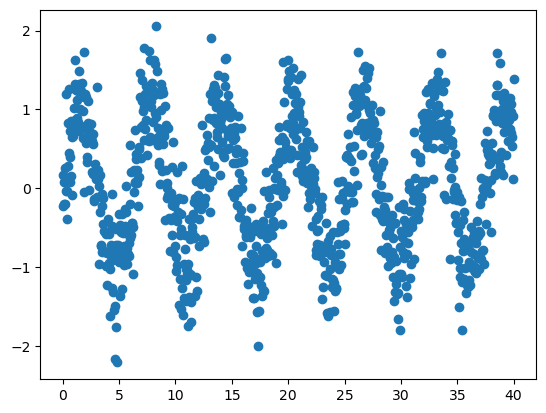

In [6]:
import numpy as np
X = np.linspace(0,40,1000)
y = np.sin(X) + norm.rvs(loc = 0, scale = .4, size = 1000)
fig, ax = plt.subplots()
ax.scatter(X, y);

#### Starting point: the dummy model

Dummy regressor: average of our $\{y_i\}$ as a model of our data.

In [7]:
%%capture dummyapprox
fig, ax = plt.subplots()
ax.scatter(X, y, label = 'Data')
f0 = y.mean()
ax.hlines(f0, 0, 40, linestyle = '--', color = 'r', label = 'Dummy Regressor')
ax.set_ylabel('y')
ax.set_xlabel('X')
ax.legend()
plt.show()

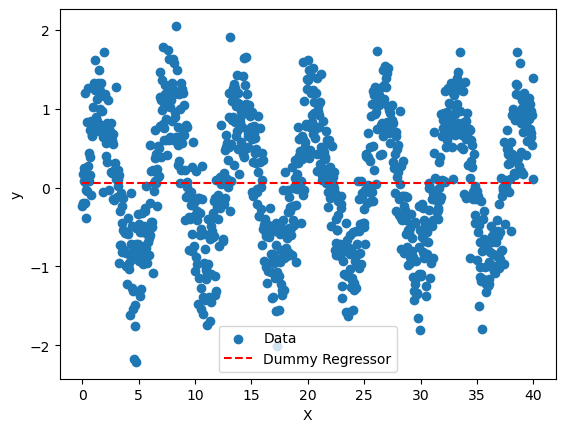

In [8]:
dummyapprox()

#### Now walk through process of "boosting" this prediction with weak learner sequence.

In [9]:
def simple_boosting_algorithm(X, y, n_learners, learner,
                              learning_rate):
    y = y.ravel()
    # calculates the dummy model
    f0 = y.mean()
    
    # calculates error of first step
    residuals = y - f0
    
    # This next line fills an array of len(y) with the mean of y.
    f = np.full(len(y), fill_value=f0)

    # start sequential training 

    for i in range(n_learners):
        # error of previous model
        residuals = y - f
        
        # fit error with decision tree
        mod = learner.fit(X.reshape(-1, 1), residuals)

        # update f
        f = learning_rate * mod.predict(X.reshape(-1, 1)) + f
        fit_df = pd.DataFrame({'x': X, 'F': f})
    return fit_df
    
   

In [10]:

from bokeh.layouts import column,row
from bokeh.models import ColumnDataSource, Slider, TextInput, Select
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
from bokeh.themes import Theme
import yaml
import numpy as np
output_notebook()

def bk_app(doc):
    
    func_approx =simple_boosting_algorithm(X=X,
                      y=y,
                      n_learners= 1,
                      learner=DecisionTreeRegressor(max_depth= 1),
                      learning_rate=0.02)

    source = ColumnDataSource(func_approx)

    # Create plots and widgets
    plot = figure()

    plot.circle(X, y, size = 6, color = 'blue', legend_label= 'Data')
    plot.line('x', 'F', source = source, line_width=3, line_alpha=1, color = 'red', legend_label = 'Boosting') 

    # Create Slider object
     
    tree_depth = Slider(start=1, end=10, value=1,
                    step=1, title='Tree Depth')  
    
    n_est = TextInput(title="Number of estimators", value = '1')
    
    lr = Select(title="Learning rate", value='5e-1',
               options=['1e-4', '1e-3', '5e-3', '1e-2', '5e-2', '1e-1', '5e-1', '1'])

    # Adding callback code
    def callback(attr, old, new):
        N = n_est.value
        depth = tree_depth.value
        learn_rate = float(lr.value)
        
        func_approx =simple_boosting_algorithm(X=X,
                              y=y,
                              n_learners= int(N),
                              learner=DecisionTreeRegressor(max_depth= depth),
                              learning_rate= float(learn_rate))

        source.data = func_approx


    tree_depth.on_change('value', callback)
    n_est.on_change('value', callback)
    lr.on_change('value', callback)

    doc.add_root(row(
        plot,
        column(tree_depth, n_est, lr),
    ))

    doc.theme = Theme(json=yaml.load("""
        attrs:
            Figure:
                background_fill_color: white
                outline_line_color: white
                toolbar_location: above
                height: 450
                width: 450
    """, Loader=yaml.FullLoader))



Loading BokehJS ...

The effects of sequential boosting with weak learners:

In [12]:
show(bk_app, notebook_url="http://localhost:8890")

Gradient boosting:
    
- Tuning hyperparameters can be very important for performance.

- Number of estimators (convergence/overfitting)
- learning rate (too high...overfit)
- tree depth (too large...overfit)

Critical hyperparameters in balance between underfitting/overfitting

Playing around with hyperparameters

In [15]:
show(bk_app, notebook_url="http://localhost:8890")

Why do all this?

- Decision trees can be very fast.
- Weak learners (particularly stumps) are even **faster**.

In principal:
- can tune and fit models really quickly.

Our naive implementation: 
- can be a little sensitive to overfitting 
- certainly overfits more than random forests.


Gets much better with extra randomization: 
- Random feature subset selection on individual trees 
- Randomly sampling subset of training data to improve on error at each stage.


Even better with regularization on trees:

$$ L = \sum_{i=1}^N l(y_i, \hat{y}_i) + \gamma \sum_{m=1}^M \Omega(h_m)$$
- $\Omega$: complexity of tree at the mth step. 
- $\gamma$: controls penalty on complexity 

**Penalizing building more complex trees but also allows for it if necessary**

$\gamma$ controls tree pruning. If branch doesn't minimize error (maximize imformation gain) **enough** then cut it.

<img src = "Images/pruning_reg.webp" />

#### Use above strategies + a lot of algorithm optimization

- XGBoost (Extreme Gradient Boosting)



<img src = "Images/xgboost.png" />
<center>Package integrates well with scikit-learn</center>

Load in the XGB classifier/regressor

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [17]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

#### Hyperparameters to tune and ranges

| Hyperparameter | Description  | Typical ranges | <center> Comments </center> |
| --- | --- | --- | --- |
| n_estimator | Number of trees <br> (iterations in sequence) | 50-500 | <center> Can get into low thousands. <br> Increasing beyond certain point: <br> overfitting or no benefit. </center>  |
| max_depth | Maximum tree depth of learners | 3-6 |<center> Increment by 1. <br> Changing depth: huge effect. </center>| 
| learning_rate | The learning rate | 1e-3 to 1 | <center> Proper regularization/randomization <br> allows for faster learning rates <br> ~ 0.1-1 </center>   |
|  <font color='red'>gamma </font>| Tree complexity regularization | 0 - 100 | <center> Primary knob for tree regularization </center>   |
| <font color='red'>colsample_bytree </font> | <center> Fraction of features <br> randomly sampled by tree </center> | 0.5 - 1 | <center> Regularizing effect  <br>colsample_bylevel, colsample_bynode:<br> add extra degrees of randomization </center>|

XGB estimators fits neatly and seamlessly into scikit-learn model pipelines, grid search, etc.

In [19]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [20]:
params = {'max_depth': [3,4, 5], 'learning_rate': [.1, .3, .5],
          'gamma': [0,5,10], 'n_estimators': [50,100, 150] }
cv = GridSearchCV(estimator = XGBRegressor(objective='reg:squarederror'), scoring='neg_mean_absolute_error',
                  param_grid = params, cv = 5)
cv.fit(X_train.reshape(-1,1), y_train);

In [21]:
cv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
cv.best_score_

-0.34665344193174275

In [23]:
best_mod = cv.best_estimator_
best_mod.fit(X_train.reshape(-1,1), y_train);
y_pred = best_mod.predict(X_test)

In [24]:
total_preds = best_mod.predict(X_train)

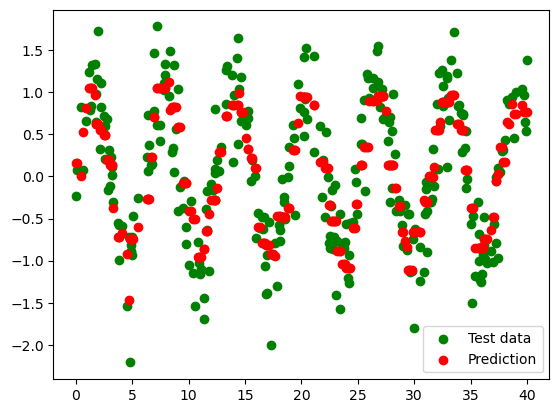

In [25]:
fig, ax = plt.subplots()
ax.scatter(X_test, y_test, c ='g', label = 'Test data')
ax.scatter(X_test, y_pred, c ='r', label = 'Prediction')
ax.legend()
plt.show()

Clearly doing pretty well with variance
- CV average MAE at scale of intrinsic noise in model.
- Also doing decently with bias. Sine wave amplitude ~ 1.

#### How about something a little more complicated?

In [26]:
# load data
file_path = "Data/WHO_life.csv"
who_df = pd.read_csv(file_path).drop(columns = ['Adult Mortality', 'infant deaths',
                                            'Year', 'Status', ' thinness 5-9 years', 'Country', 
                                            'under-five deaths ']).dropna()
# clean column names
who_df.columns = who_df.columns.str.strip()

X_who, y_who = who_df.drop(columns = ['Life expectancy']), who_df['Life expectancy']

In [27]:
X_who.head()

,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5


In [28]:
y_who.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [29]:
# Train test split
X_who_train, X_who_test, y_who_train, y_who_test = train_test_split(X_who, y_who, test_size = 0.3)

In [30]:
params = {'max_depth': [3,4, 5], 'learning_rate': [.1, .3, .5],
          'gamma': [0,5,10], 'colsample_bynode': [.5, .75, 1], 'n_estimators': [50,100, 150] }
cv = GridSearchCV(estimator = XGBRegressor(objective='reg:squarederror'), scoring='neg_mean_absolute_error',
                  param_grid = params, cv = 5)
cv.fit(X_who_train, y_who_train);

In [31]:
cv.best_score_

-1.6193478983888603

In [32]:
best_regressor = cv.best_estimator_
best_regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=1, colsample_bytree=None,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [33]:
best_regressor.fit(X_who_train, y_who_train)
y_pred_train = best_regressor.predict(
    X_who_train)
y_pred_test = best_regressor.predict(X_who_test)

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [35]:
MAE = mean_absolute_error(y_who_test, 
                          y_pred_test)
print(MAE)

1.6257110302857678


In [36]:
RMSE = np.sqrt(mean_squared_error(y_who_test,
                                  y_pred_test))
print(RMSE)

2.297783912235346


Train and test: $R^2$ score

In [37]:
r2_score(y_who_train, y_pred_train)

0.9930217016504145

In [38]:
r2_score(y_who_test, y_pred_test)

0.9339676788696416

Comparing this to our simple multiple linear regression:
- $R^2 = 0.76$ 
- MAE of ~3.5.
- Had to carefully remove correlated features.
- Standardize for feature weight importance or regularization.


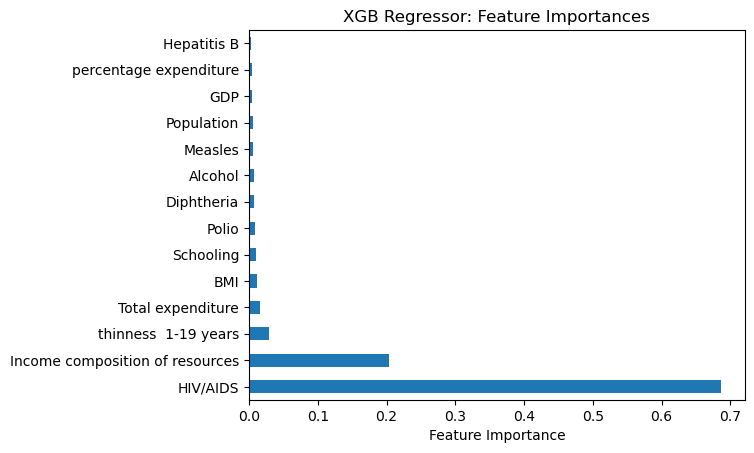

In [39]:
feat_imp = pd.Series(best_regressor.feature_importances_,
             index = X_who.columns).sort_values(ascending = False)
fig, ax = plt.subplots()
feat_imp.plot(kind = 'barh', ax = ax)
ax.set_xlabel('Feature Importance')
ax.set_title('XGB Regressor: Feature Importances')
plt.show()

Exact same with classification:
- XGBClassifier()
- basically same hyperparameters
- just different objective function


#### Gradient boosting

- Needs tuning
- But extremely fast and effective (as has been seen)
- Along with random forest: workhorse of classification/regression in many professional workflows.